In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


iris = datasets.load_iris()

X = iris.data
y = iris.target
y_labels = np.unique(y)
y = np.eye(np.max(y_labels)+1)[y]
labels = np.argmax(y, axis=1)


In [39]:
def softmax(x):
    x_max = np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x - x_max)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

class my_model:
  def __init__(self, X, Y, epochs=200, learning_rate=0.1):
    self.w = np.random.rand(len(y_labels), len(X[0]))
    self.b = np.random.rand(1, len(y_labels))
    self.epochs = epochs
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
    self.learning_rate = learning_rate
    self.accuracy = None
    self.test_accuracy = None
    self.w_history = [self.w]
    self.b_history = [self.b]

  def train(self):
    for i in range(self.epochs):
      logits = self.X_train @ self.w.T + self.b
      pik = softmax(logits)
      pik_max = np.max(pik, axis=1)
      predicted_classes = np.argmax(pik, axis=1)
      loss = -np.sum(self.y_train * np.log(pik))/len(self.y_train)
      grad_w = ((pik - self.y_train).T @ self.X_train)/ len(self.X_train)
      grad_b =  np.sum(pik - self.y_train, axis=0) / len(self.X_train)

      self.w = self.w - self.learning_rate*grad_w
      self.b = self.b - self.learning_rate*grad_b
      self.w_history.append(self.w.copy())
      self.b_history.append(self.b.copy())

      true_classes = np.argmax(self.y_train, axis=1)
      self.accuracy = np.mean(predicted_classes == true_classes)*100

  def test(self):
    logits = self.X_test @ self.w.T + self.b
    pik = softmax(logits)
    predicted_classes = np.argmax(pik, axis=1)
    true_classes = np.argmax(self.y_test, axis=1)
    test_accuracy = np.mean(predicted_classes == true_classes)*100
    self.test_accuracy = test_accuracy

  def predict(self, X, w=None, b=None):
    if w is not None and b is not None:
      logits = X @ w.T + b
    else:
      logits = X @ self.w.T + self.b
    pik = softmax(logits)
    predicted_classes = np.argmax(pik, axis=1)
    return predicted_classes



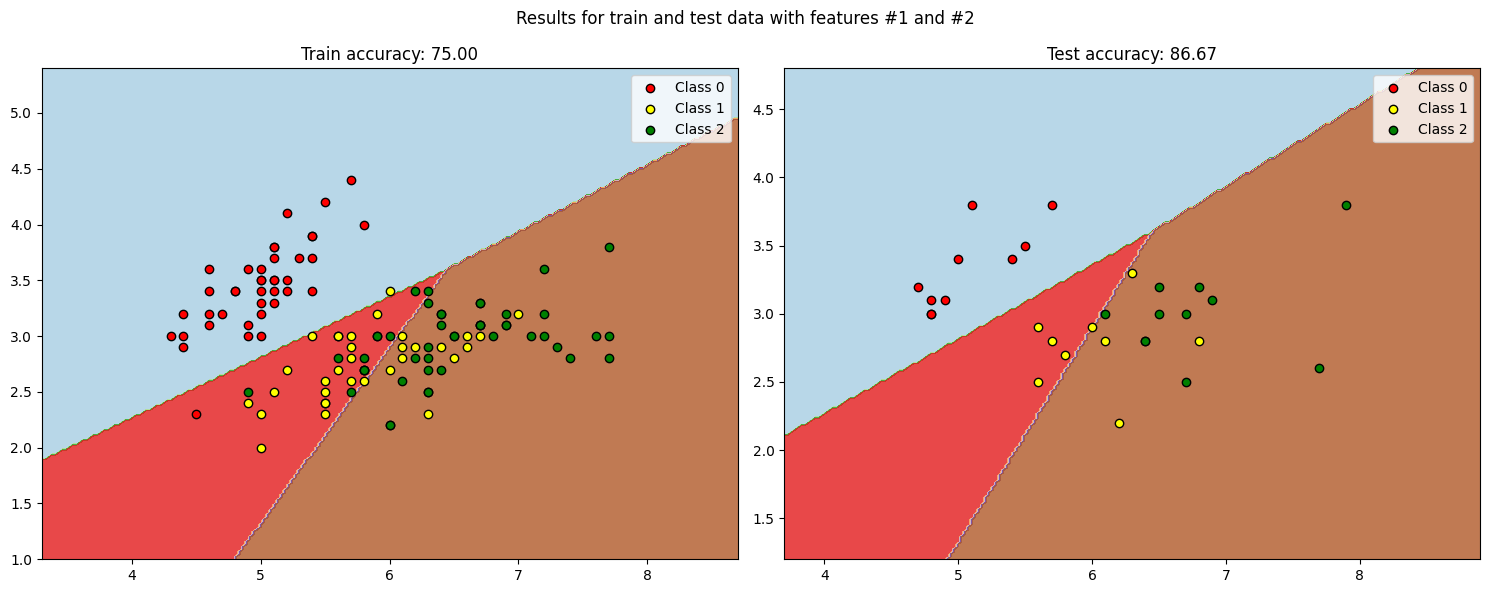

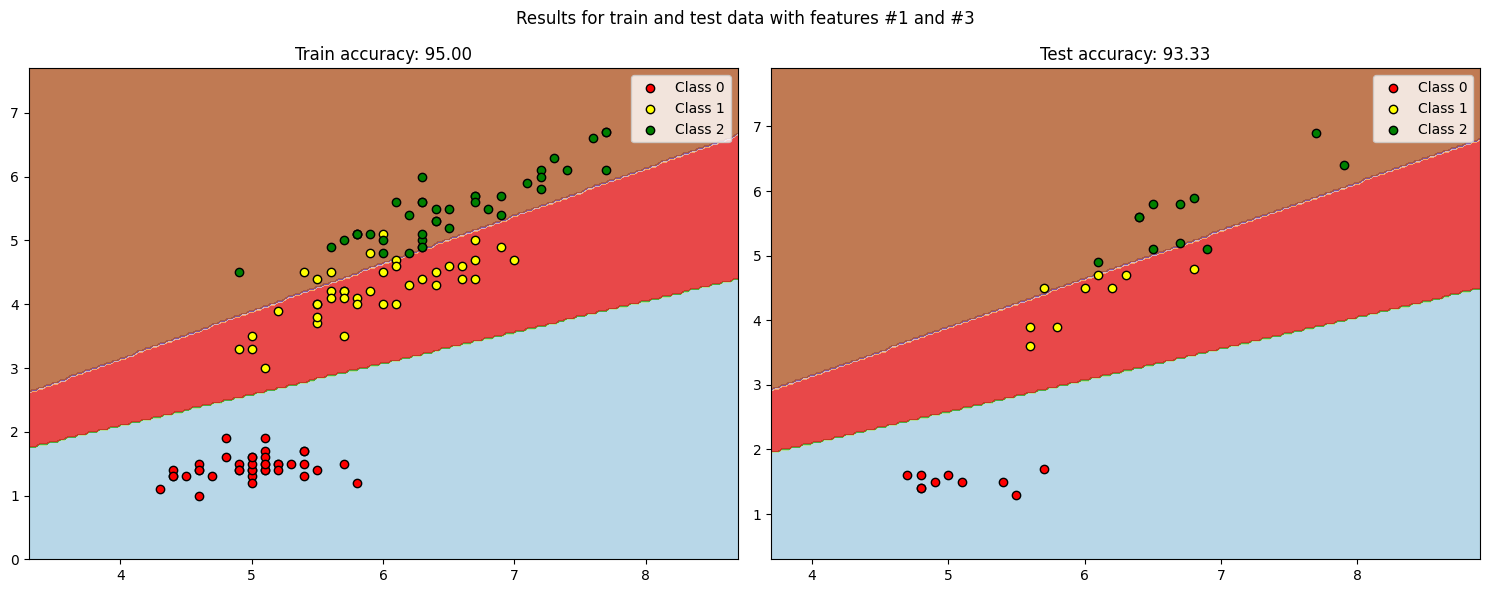

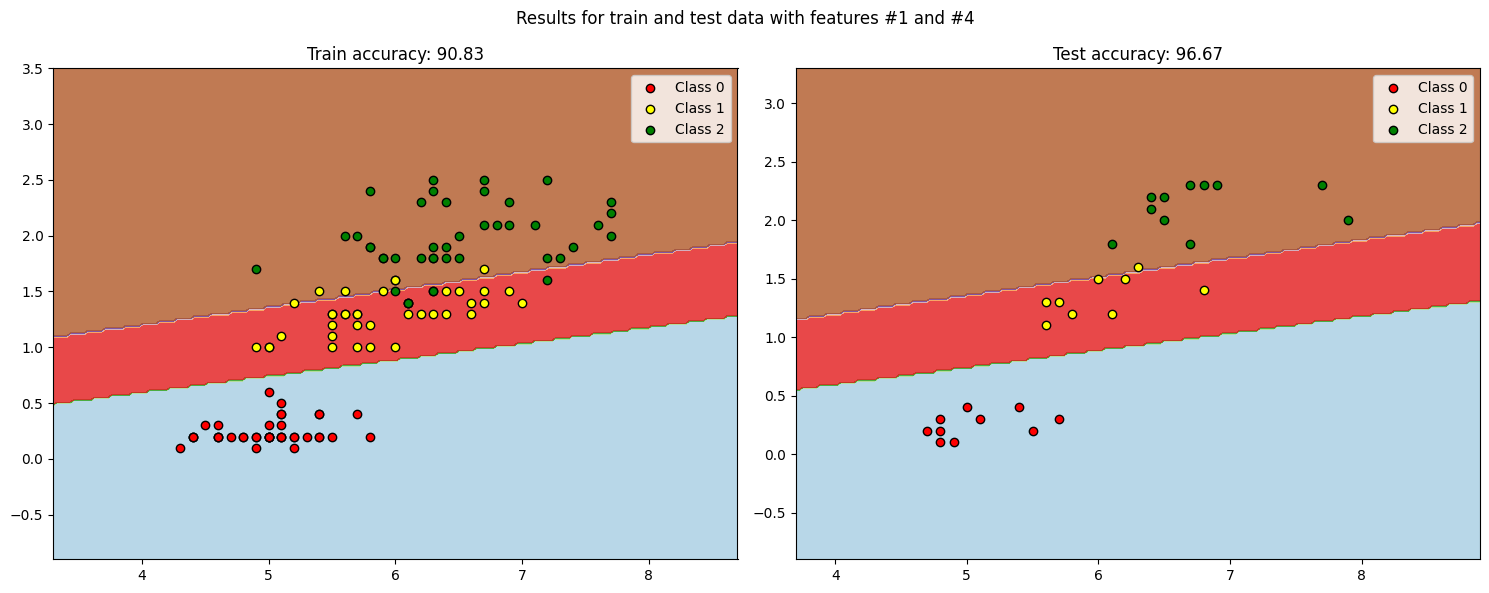

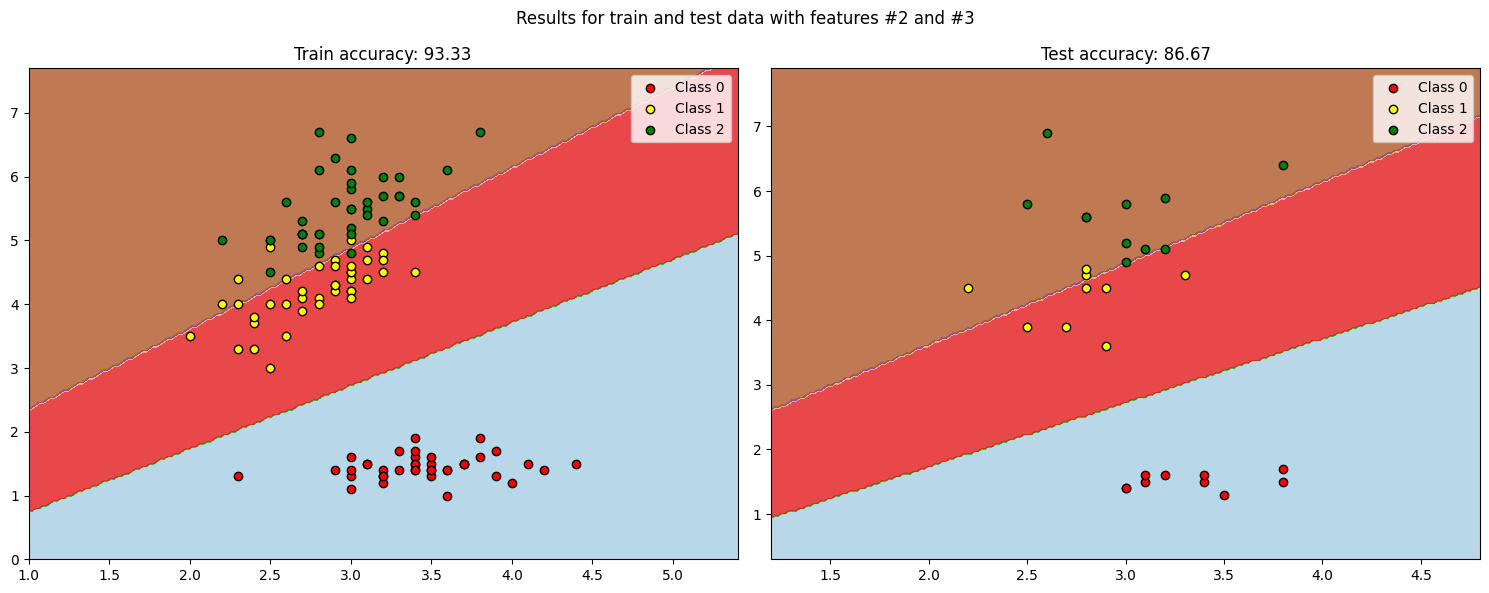

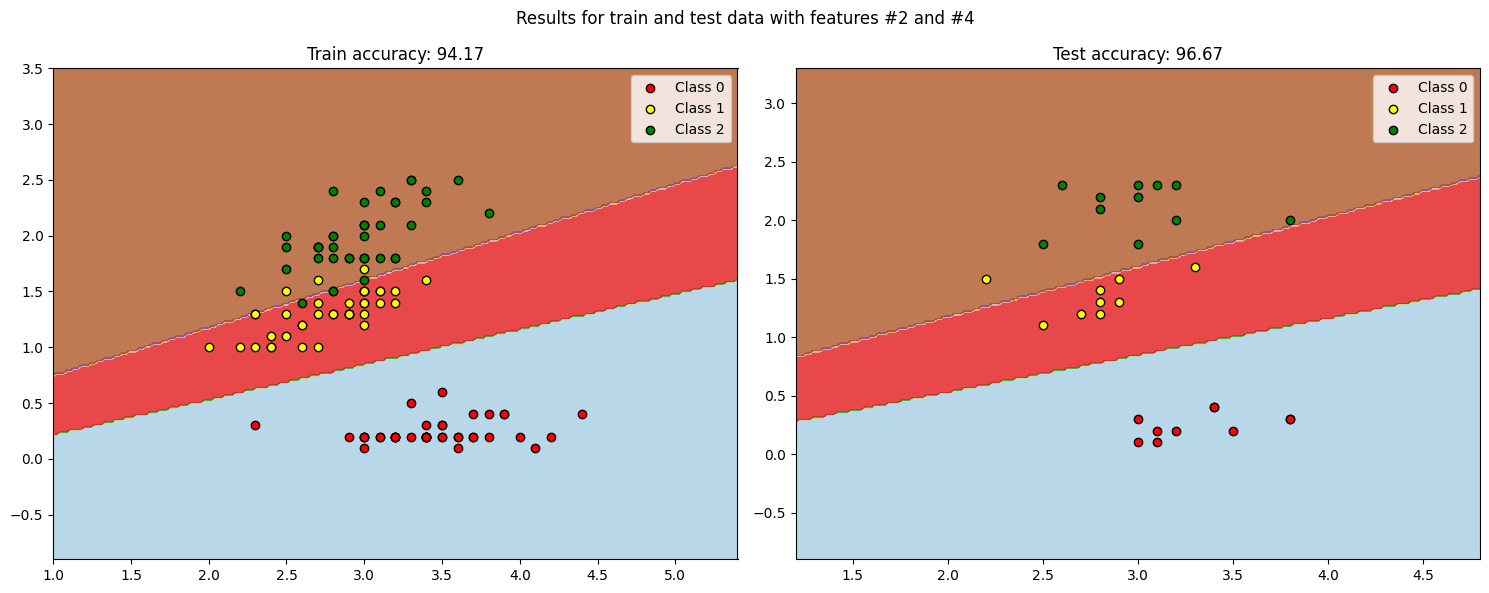

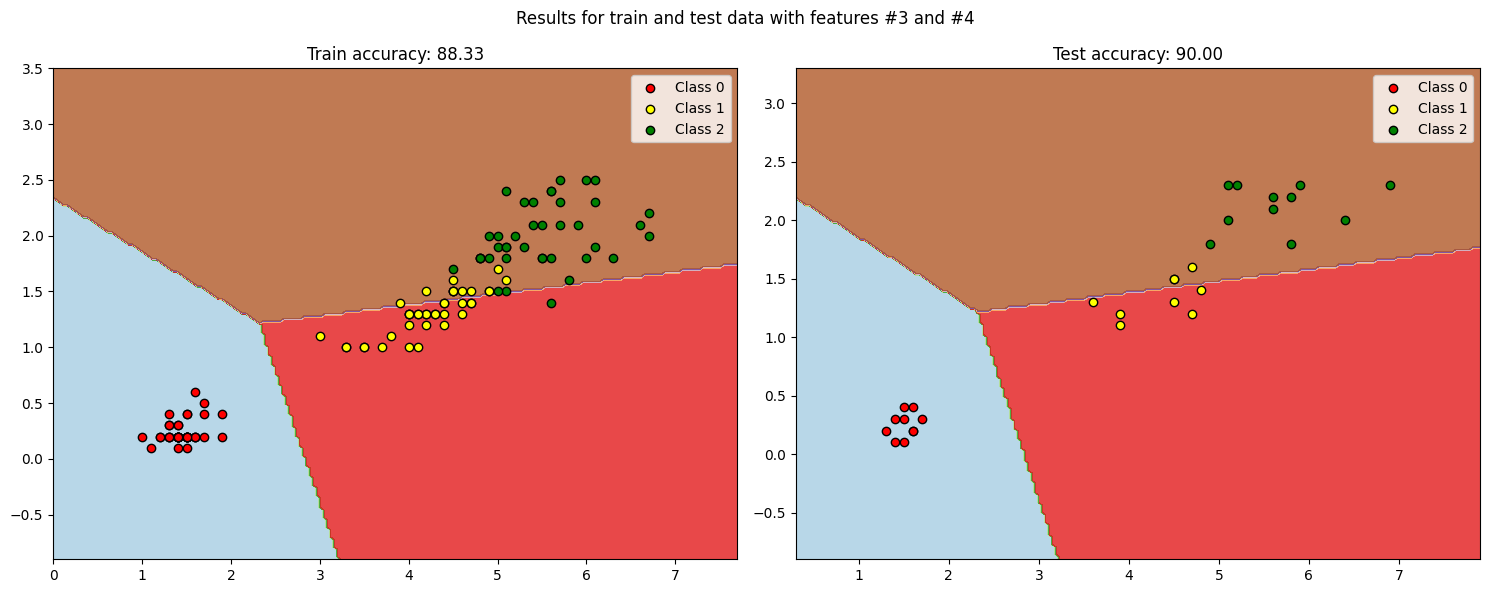

In [43]:
def plot_decision_boundary(ax, model, X, y,resolution=0.01, w=None, b=None):
    X_min, X_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(X_min, X_max, 200), np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()]
    predicted_classes = model.predict(grid, w, b).reshape(xx.shape)

    ax.contourf(xx, yy, predicted_classes, alpha=0.8, cmap=plt.cm.Paired)

    colors = ['red', 'yellow', 'green']
    y = np.argmax(y, axis=1)
    for class_value in range(3):
        points = X[y==class_value]
        ax.scatter(
            points[:,0],
            points[:,1],
            color=colors[class_value], label=f"Class {class_value}", edgecolor='k'
        )
    ax.legend()


from itertools import combinations
numbers = range(4)
connections = list(combinations(numbers, 2))

for connection in connections:
  f1, f2 = connection[0], connection[1]
  fig, axes = plt.subplots(1, 2, figsize=(15, 6))
  plt.suptitle(f"Results for train and test data with features #{f1+1} and #{f2+1}")
  model1 = my_model(X[:, [f1, f2]], y)
  model1.train()
  model1.test()
  plot_decision_boundary(axes[0], model1, model1.X_train, model1.y_train)
  axes[0].set_title(f"Train accuracy: {model1.accuracy:.2f}")
  plot_decision_boundary(axes[1], model1, model1.X_test, model1.y_test)
  axes[1].set_title(f"Test accuracy: {model1.test_accuracy:.2f}")
  plt.tight_layout()
  plt.show()


# Plots of training for every 20 epochs

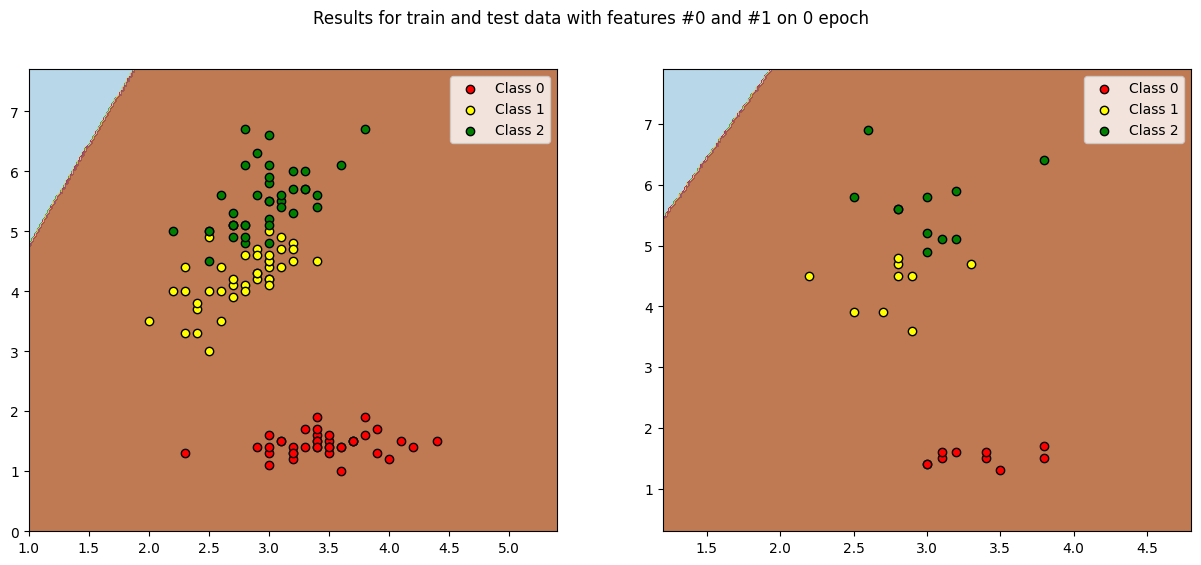

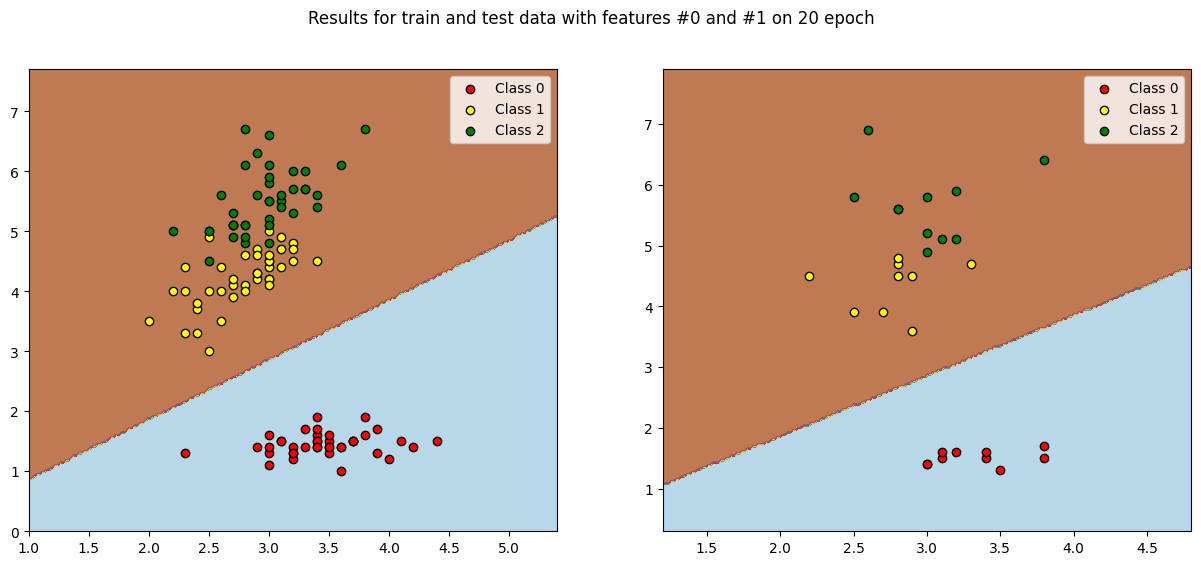

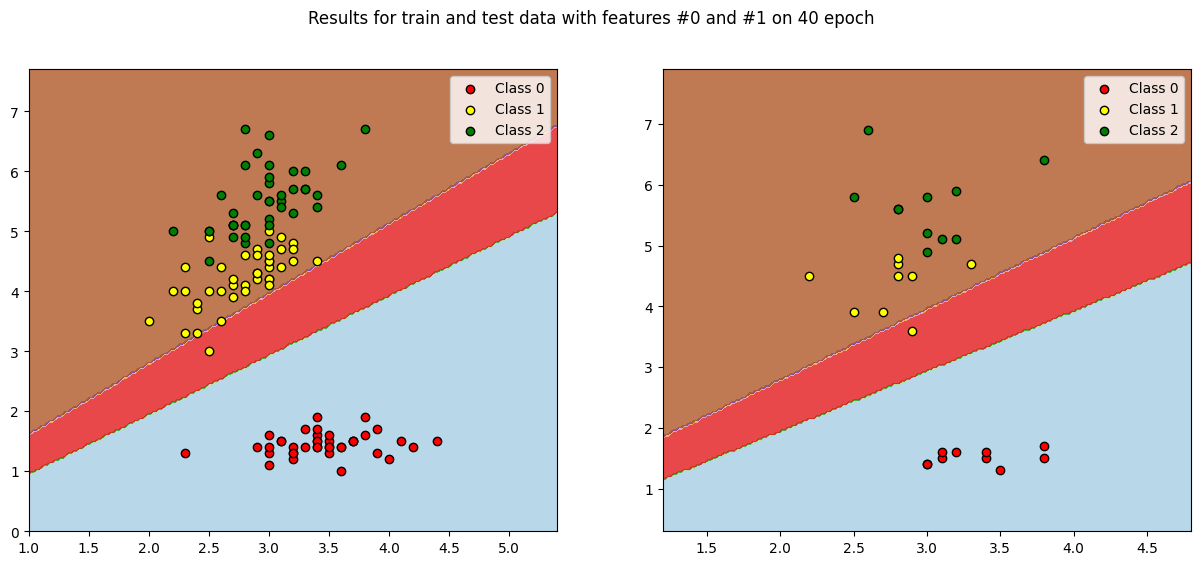

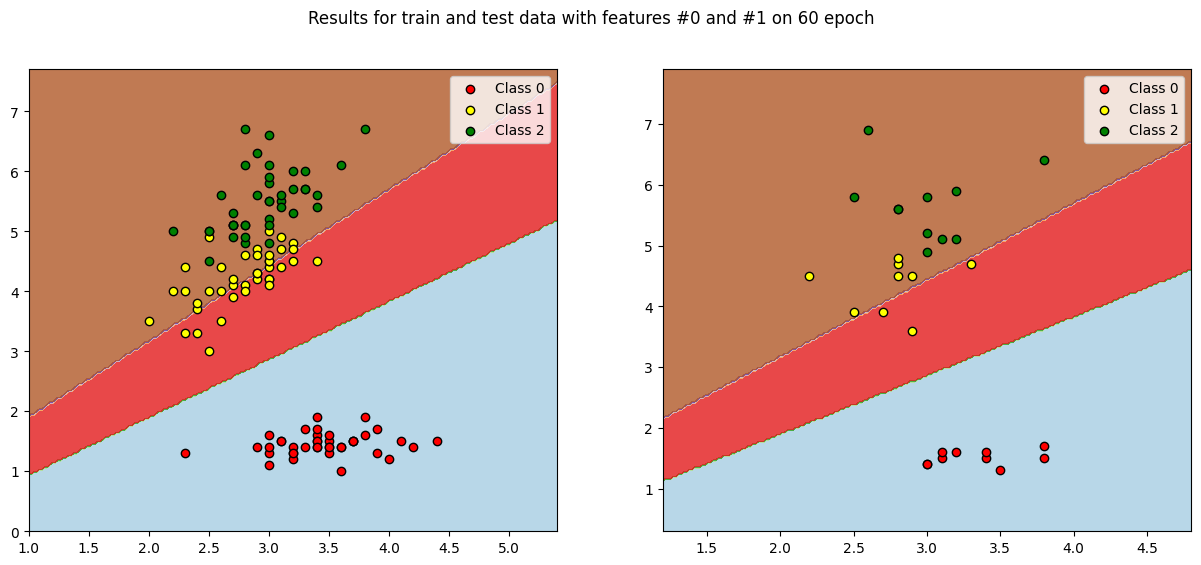

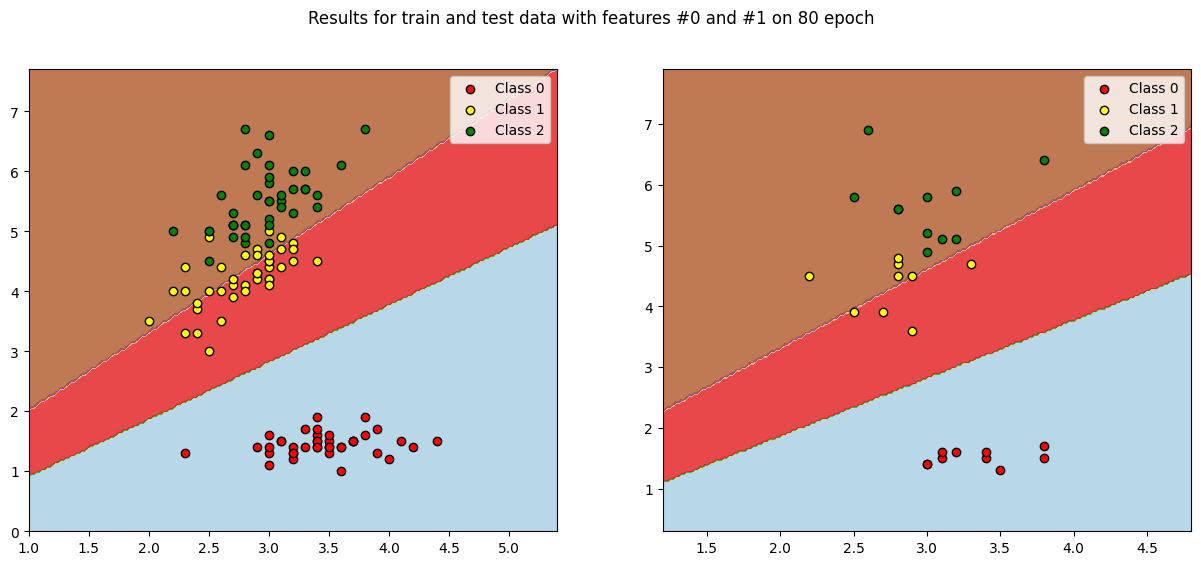

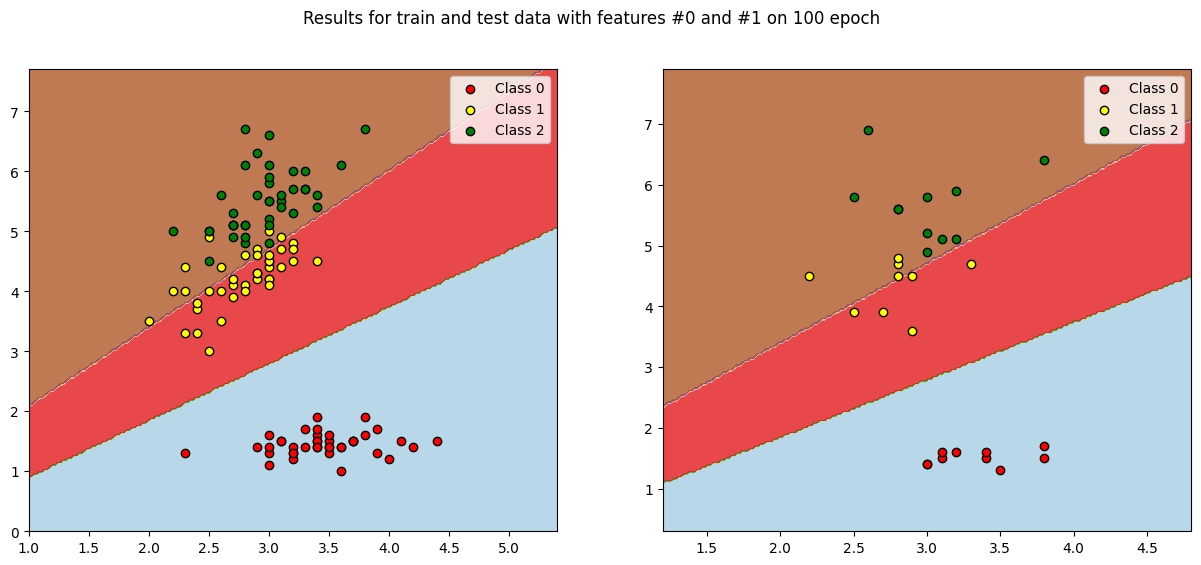

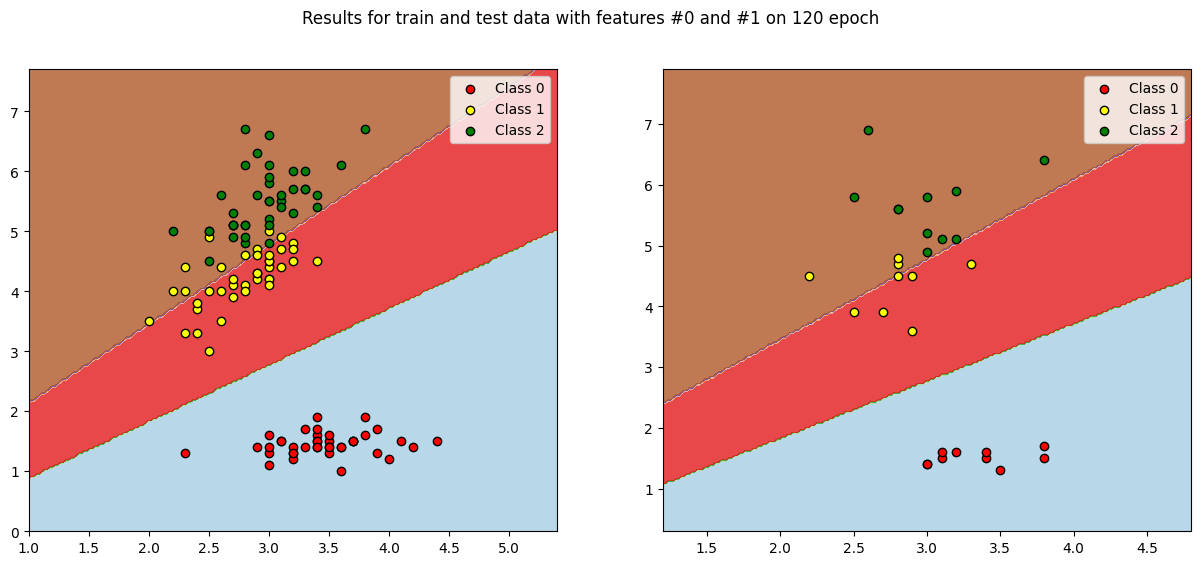

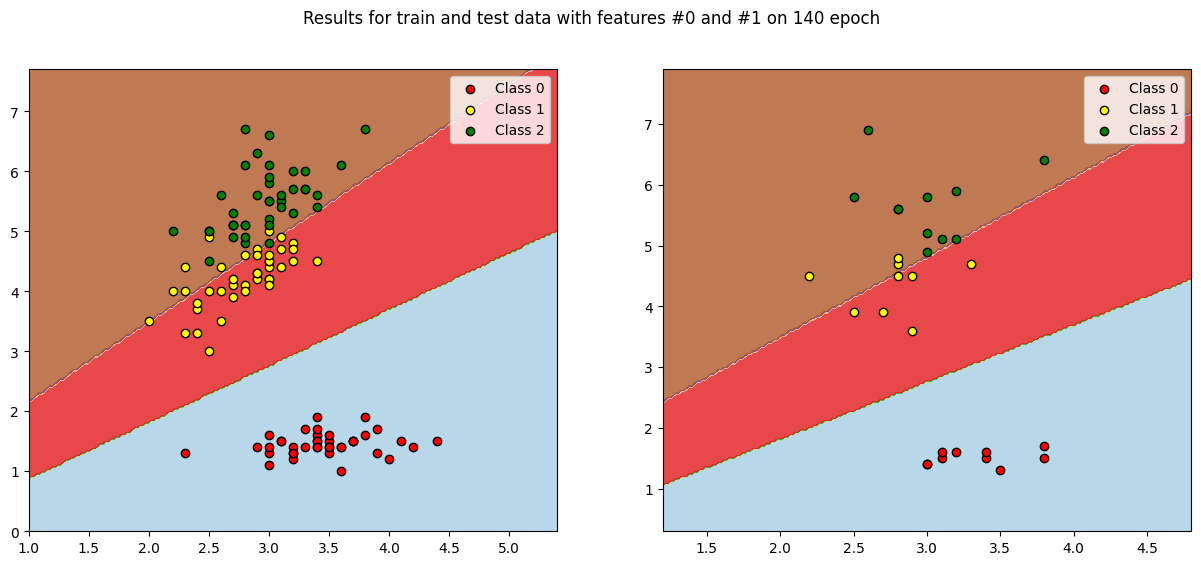

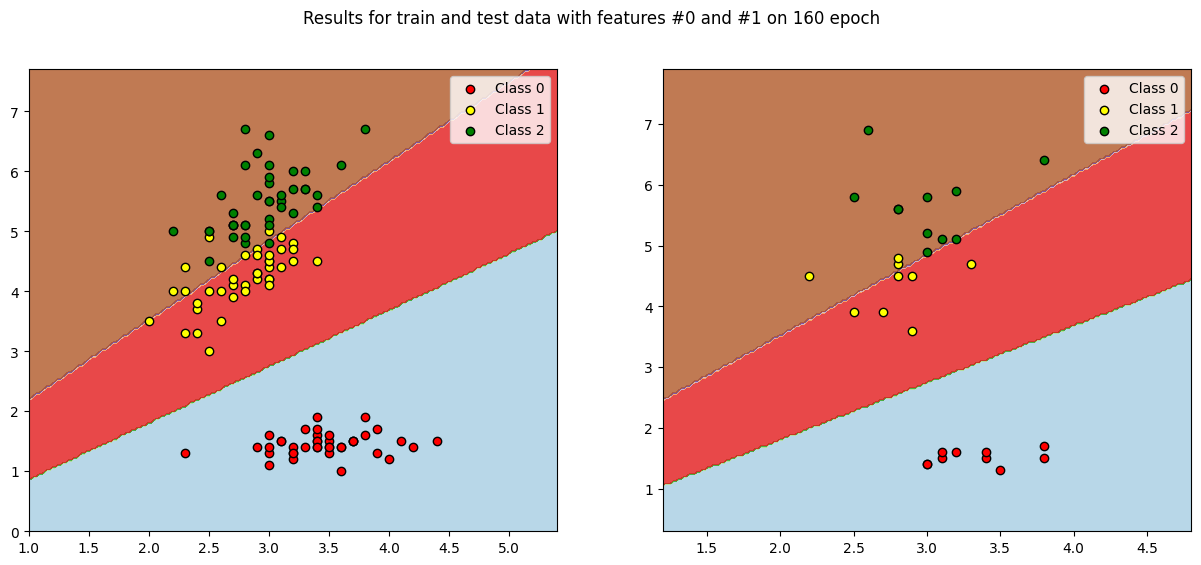

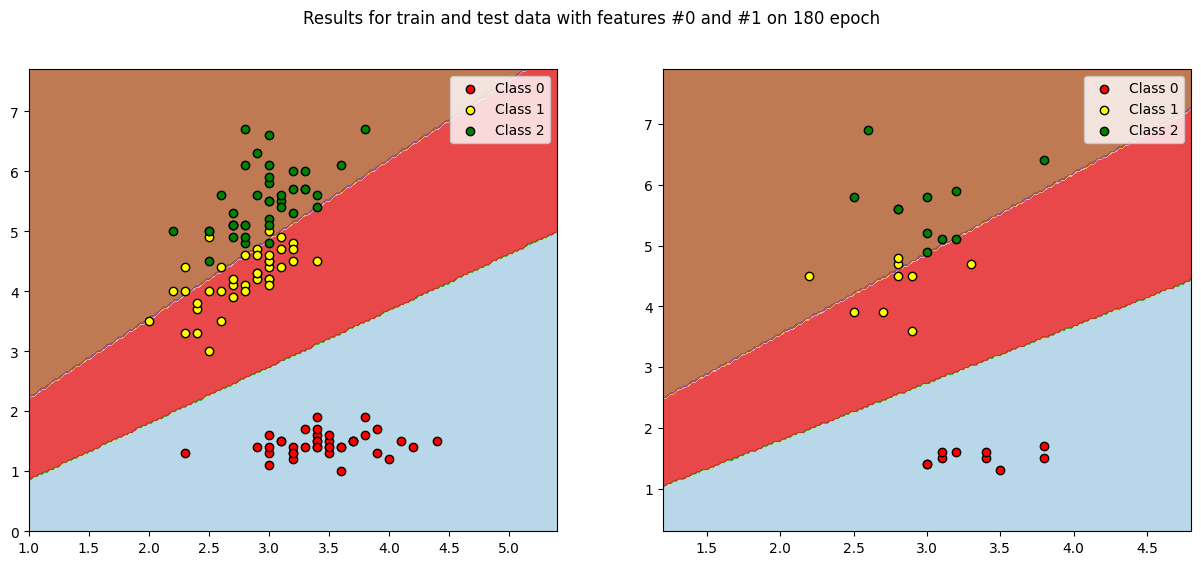

In [42]:
model1 = my_model(X[:, [1, 2]], y)
model1.train()
model1.test()

w = model1.w_history
b = model1.b_history

for n in range(0,200,20):
  fig, axes = plt.subplots(1, 2, figsize=(15, 6))
  plt.suptitle(f"Results for train and test data with features #{0} and #{1} on {n} epoch")
  plot_decision_boundary(axes[0], model1, model1.X_train, model1.y_train, w=w[n], b=b[n])
  plot_decision_boundary(axes[1], model1, model1.X_test, model1.y_test, w=w[n], b=b[n])
  plt.show()
